# Visualization Exercise Sheet

----------------------------------------------------------

In these short questions we will have you work with data from the GALAH spectroscopic survey (https://www.galah-survey.org) of stars in the Milky Way disk, and practice some visualization techniques to help analyze trends in the data.

You will find helpful documentation and examples to help you make the plots at the following graph galleries.
https://python-graph-gallery.com

https://matplotlib.org/stable/plot_types/index.html

**Download the data file 'galahamr.sav' located in the Moodle exercises page, which contains measurements of physical properties of ~7000 nearby stars.**

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#Read in data set
from scipy.io import readsav
filepath = 'galahamr.sav'  #change this to the path on your computer where the file is stored
stars = readsav(filepath)  

In [3]:
#Pull out some attributes of the stars we want to look at and store them in arrays
logg = stars['f']['logg']  #surface gravity   
teff = stars['f']['teff']  #effective temperature
mass = stars['f']['massmean']  #mass
lum = mass**4.  #luminosity for stars 0.43 < Msun < 2
age = stars['f']['agemean'] #age
feh = stars['f']['__fe_h_'] #[Fe/H], a logarithmic Iron abundance
afe = stars['f']['__alpha_fe_']  #[Alpha/Fe], logarithmic relative abundance of alpha elements(O, Si, etc.) relative to Iron

### 1) Consider one version of the Hertzsprung-Russell diagram using effective temperature and surface gravity of the stars ( $T_{eff}$, log(g) ).  Make two types of plots of the stars, with clearly labeled axes and colorbars where suitable: 
* a) a scatter plot with the points colored by age 
* b) a 2D density plot using, e.g. the **kde** package along with the **pcolormesh** routine in matplotlib; or hist2d within matplotlib

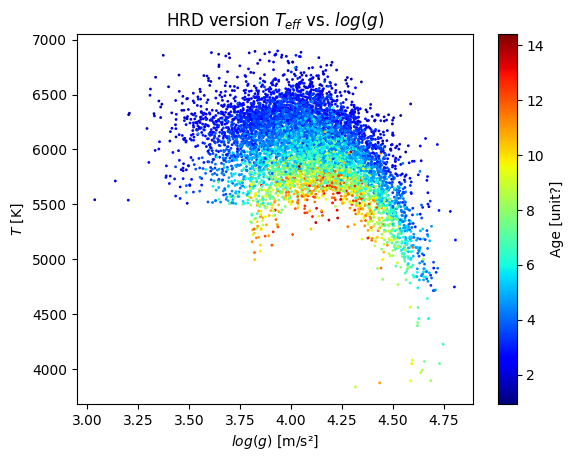

In [4]:
plt.figure()
sc= plt.scatter( logg, teff, s=1, c=age, cmap='jet' )
cbar= plt.colorbar( sc )
cbar.set_label( 'Age [unit?]' )
plt.title( 'HRD version $T_{eff}$ vs. $log(g)$' )
plt.xlabel( '$log(g)$ [m/s²]' )
plt.ylabel( '$T$ [K]' )
plt.show()

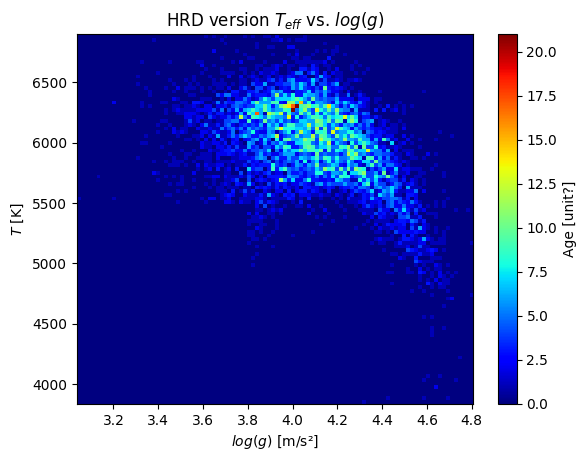

In [5]:
plt.figure()
counts, xedges, yedges, img= plt.hist2d( logg, teff, bins=100, cmap='jet' )
plt.colorbar( label='Age [unit?]' )
plt.title( 'HRD version $T_{eff}$ vs. $log(g)$' )
plt.xlabel( '$log(g)$ [m/s²]' )
plt.ylabel( '$T$ [K]' )
plt.show()

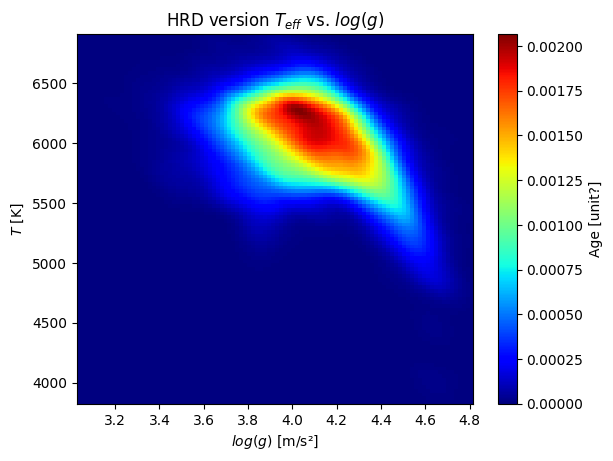

In [6]:
from scipy.stats import gaussian_kde

loggmin= logg.min()
loggmax= logg.max()
teffmin= teff.min()
teffmax= teff.max()
G, T= np.mgrid[loggmin:loggmax:100j, teffmin:teffmax:100j]
positions= np.vstack([G.ravel(), T.ravel()])

kde= gaussian_kde( np.vstack( [logg, teff] ) )
Z= np.reshape( kde(positions).T, G.shape )

plt.figure()
plt.pcolormesh( G, T, Z, shading='auto', cmap='jet' )
plt.colorbar( label='Age [unit?]' )
plt.title( 'HRD version $T_{eff}$ vs. $log(g)$' )
plt.xlabel( '$log(g)$ [m/s²]' )
plt.ylabel( '$T$ [K]' )
plt.show()

### 2) Use a built-in, or hand-written routine to compute the running average of $T_{eff}$ as a function of $log(g)$.  Overplot this average approximation to the distribution of stars.  It should roughly subdivide the sample into cooler and hotter stars at a given value of $log(g)$.

### 3) [OPTIONAL]  Compute the mean and standard deviation ($\sigma$) of the ages of the cool and hot star sub-samples

* What percent of stars have an age that is within $1-\sigma$ of the mean ages of *both* the cool and hot star sub-samples?  e.g., the fraction of stars that have ages within
 
$(mean(age_{hot}) +\sigma(age_{hot}))$ $\leq age \leq$ $(mean(age_{cool}) -\sigma(age_{cool}))$

### 4) Create two versions of a *weighted* 2D density distribution of the sample of stars in the plane of **[Fe/H]** as a function of **age**:
* a) One where the density distribution is weighted by the mass of the stars
* b) One where the density distribution is weighted by the luminosity of the stars

Compute the weighted average metallicity and age for both cases and indicate them on the density distributions.